[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oreilly-japan/RecommenderSystems/blob/main/chapter5/colab/data_download.ipynb)

# Movielensのデータのダウンロード

In [1]:
# MovieLensのデータセットをdataディレクトリにダウンロードして展開
!wget -nc --no-check-certificate https://files.grouplens.org/datasets/movielens/ml-10m.zip -P ../data
!unzip -n ../data/ml-10m.zip -d ../data/

--2026-02-02 10:43:49--  https://files.grouplens.org/datasets/movielens/ml-10m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.96.204
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65566137 (63M) [application/zip]
Saving to: ‘../data/ml-10m.zip’

ml-10m.zip          100%[===================>]  62.53M  25.2MB/s    in 2.5s    

2026-02-02 10:43:52 (25.2 MB/s) - ‘../data/ml-10m.zip’ saved [65566137/65566137]

Archive:  ../data/ml-10m.zip
   creating: ../data/ml-10M100K/
  inflating: ../data/ml-10M100K/allbut.pl  
  inflating: ../data/ml-10M100K/movies.dat  
  inflating: ../data/ml-10M100K/ratings.dat  
  inflating: ../data/ml-10M100K/README.html  
  inflating: ../data/ml-10M100K/split_ratings.sh  
  inflating: ../data/ml-10M100K/tags.dat  


# Movielensのデータの確認

In [2]:
import pandas as pd

In [3]:
# 映画の情報の読み込み(10681作品)
# movieIDとタイトル名のみ使用
m_cols = ['movie_id', 'title', 'genre']
movies = pd.read_csv('../data/ml-10M100K/movies.dat', names=m_cols, sep='::' , encoding='latin-1', engine='python')

# genreをlist形式で保持する
movies['genre'] = movies.genre.apply(lambda x:x.split('|'))
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [19]:
user_ratings_data = []

for index, row in user_selected_movies_df.iterrows():
    movie_title = row['title']
    movie_id = row['movie_id']
    while True:
        rating_input = input(f"'{movie_title}' の評価を入力してください (0.5-5.0, 0.5刻み。見ていなければEnter): ")
        if rating_input == '':
            print(f"'{movie_title}' の評価をスキップしました。")
            break
        try:
            rating = float(rating_input)
            if 0.5 <= rating <= 5.0 and rating * 2 == int(rating * 2): # 0.5刻みチェック
                user_ratings_data.append({
                    'user_id': -1, # 仮のユーザーIDとして-1を使用
                    'movie_id': movie_id,
                    'rating': rating,
                    'timestamp': pd.Timestamp.now().timestamp() # 現在時刻をタイムスタンプとして記録
                })
                break
            else:
                print("無効な入力です。0.5から5.0の範囲で、0.5刻みで入力してください。")
        except ValueError:
            print("無効な入力です。数値で入力してください。")

if user_ratings_data:
    user_ratings_df = pd.DataFrame(user_ratings_data)

    # user_ratings_dfに映画の詳細情報をマージする
    user_ratings_with_details = user_ratings_df.merge(movies, on='movie_id', how='left')
    # timestamp_rankを追加する（ユーザー評価は最新として扱うため、NaNで問題ない）
    user_ratings_with_details['timestamp_rank'] = np.nan # ユーザー評価は最新なのでランクなし

    print("\nあなたの評価データが作成されました:")
    display(user_ratings_with_details.head())

    # 既存のmovielensデータと結合
    movielens_with_user_ratings = pd.concat([movielens, user_ratings_with_details], ignore_index=True)
    print("\n既存のデータとあなたの評価を結合しました:")
    display(movielens_with_user_ratings.tail())
else:
    print("評価が入力されませんでした。")


KeyboardInterrupt: Interrupted by user

In [21]:
# ユーザー評価データのみをCSVに保存
if 'user_ratings_df' in locals() and not user_ratings_df.empty:
    user_ratings_df.to_csv('user_ratings_df.csv', index=False)
    print("user_ratings_df.csv を保存しました。")
else:
    print("user_ratings_df が見つからないか空のため、保存できませんでした。")

# ユーザー評価と映画詳細がマージされたデータをCSVに保存
if 'user_ratings_with_details' in locals() and not user_ratings_with_details.empty:
    user_ratings_with_details.to_csv('user_ratings_with_details.csv', index=False)
    print("user_ratings_with_details.csv を保存しました。")
else:
    print("user_ratings_with_details が見つからないか空のため、保存できませんでした。")

# 全てのデータ（既存＋ユーザー評価）をCSVに保存
if 'movielens_with_user_ratings' in locals() and not movielens_with_user_ratings.empty:
    movielens_with_user_ratings.to_csv('movielens_with_user_ratings.csv', index=False)
    print("movielens_with_user_ratings.csv を保存しました。")
else:
    print("movielens_with_user_ratings が見つからないか空のため、保存できませんでした。")


user_ratings_df.csv を保存しました。
user_ratings_with_details.csv を保存しました。
movielens_with_user_ratings.csv を保存しました。


In [20]:
# Assuming user_ratings_df is already defined from a previous run.
# If it's not defined, this cell will indicate that the user needs to provide input first.

if 'user_ratings_df' in locals() and not user_ratings_df.empty:
    print("以前の評価データを利用します。")

    # user_ratings_dfに映画の詳細情報をマージする
    user_ratings_with_details = user_ratings_df.merge(movies, on='movie_id', how='left')
    # timestamp_rankを追加する（ユーザー評価は最新として扱うため、NaNで問題ない）
    user_ratings_with_details['timestamp_rank'] = np.nan # ユーザー評価は最新なのでランクなし

    print("\nあなたの評価データが作成されました:")
    display(user_ratings_with_details.head())

    # 既存のmovielensデータと結合
    movielens_with_user_ratings = pd.concat([movielens, user_ratings_with_details], ignore_index=True)
    print("\n既存のデータとあなたの評価を結合しました:")
    display(movielens_with_user_ratings.tail())
else:
    print("以前の評価データが見つかりません。評価を入力するには、このセルを元の形に戻し、実行してください。")


以前の評価データを利用します。

あなたの評価データが作成されました:


,user_id,movie_id,rating,timestamp,title,genre,tag,timestamp_rank
0,-1,4896,5.0,1.770030e+09,Harry Potter and the Sorcerer's Stone (a.k.a. ...,"[Adventure, Children, Fantasy]","[based on a book, franchise, adventure, childr...",NaN
1,-1,5816,5.0,1.770030e+09,Harry Potter and the Chamber of Secrets (2002),"[Adventure, Children, Fantasy]","[based on a book, franchise, harry potter, dvd...",NaN
2,-1,8368,4.0,1.770030e+09,Harry Potter and the Prisoner of Azkaban (2004),"[Adventure, Children, Fantasy]","[based on a book, franchise, magic, harry pott...",NaN
3,-1,40815,4.5,1.770030e+09,Harry Potter and the Goblet of Fire (2005),"[Adventure, Fantasy, Thriller]","[based on a book, big budget, franchise, mt, m...",NaN
4,-1,54001,0.5,1.770030e+09,Harry Potter and the Order of the Phoenix (2007),"[Adventure, Drama, Fantasy, IMAX]","[franchise, too short, alan rickman, broomstic...",NaN



既存のデータとあなたの評価を結合しました:


,user_id,movie_id,rating,timestamp,title,genre,tag,timestamp_rank
132849,-1,7,4.0,1.770030e+09,Sabrina (1995),"[Comedy, Romance]","[based on a play, greg kinnear, remake, remake...",NaN
132850,-1,902,5.0,1.770030e+09,Breakfast at Tiffany's (1961),"[Drama, Romance]","[classic, capote, 1960s, apartment, beautiful ...",NaN
132851,-1,3462,3.5,1.770030e+09,Modern Times (1936),"[Comedy, Romance]","[black and white, close to perfect, factory, a...",NaN
132852,-1,741,1.5,1.770030e+09,Ghost in the Shell (KÃ´kaku kidÃ´tai) (1995),"[Animation, Sci-Fi]","[anime, anime, complex, japan, techno-evolutio...",NaN
132853,-1,26662,5.0,1.770030e+09,Kiki's Delivery Service (Majo no takkyÃ»bin) (...,"[Adventure, Animation, Children, Comedy, Fantasy]","[anime, miyazaki, anime, miyazaki, anime, haya...",NaN


In [17]:
import re

user_movie_titles = [
    "Harry Potter", # 全シリーズを代表して検索
    "となりのトトロ", "My Neighbor Totoro",
    "千と千尋の神隠し", "Spirited Away",
    "シンデレラ", "Cinderella",
    "白雪姫", "Snow White",
    "スパイダーマン", "Spider-Man",
    "リトルマーメイド", "The Little Mermaid",
    "眠りの森の美女", "Sleeping Beauty",
    "美女と野獣", "Beauty and the Beast",
    "101匹わんちゃん", "101 Dalmatians",
    "ターザン", "Tarzan",
    "ライオンキング", "The Lion King",
    "ローマの休日", "Roman Holiday",
    "サブリナ", "Sabrina",
    "ティファニーに朝食を", "Breakfast at Tiffany's",
    "モダンタイムズ", "Modern Times",
    "攻殻機動隊", "Ghost in the Shell",
    "魔女の宅急便", "Kiki's Delivery Service"
]

found_movies = []
for user_title in user_movie_titles:
    # 映画タイトルから年号を除外して検索
    search_title = re.sub(r' \(\d{4}\)', '', user_title, count=1).strip()
    matched_movies = movies[movies['title'].str.contains(search_title, case=False, na=False)]

    # 同じタイトルで複数の年号がある場合があるため、重複を避ける
    for idx, row in matched_movies.iterrows():
        if row['movie_id'] not in [m['movie_id'] for m in found_movies]:
            found_movies.append({"movie_id": row['movie_id'], "title": row['title']})

print("見つかった映画:")
if found_movies:
    for movie in found_movies:
        print(f"- {movie['title']} (ID: {movie['movie_id']})")
else:
    print("該当する映画が見つかりませんでした。")

# 次のステップで利用するためにDataFrameとして保存
user_selected_movies_df = pd.DataFrame(found_movies)
display(user_selected_movies_df.head())


見つかった映画:
- Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001) (ID: 4896)
- Harry Potter and the Chamber of Secrets (2002) (ID: 5816)
- Harry Potter and the Prisoner of Azkaban (2004) (ID: 8368)
- Harry Potter and the Goblet of Fire (2005) (ID: 40815)
- Harry Potter and the Order of the Phoenix (2007) (ID: 54001)
- My Neighbor Totoro (Tonari no Totoro) (1988) (ID: 5971)
- Spirited Away (Sen to Chihiro no kamikakushi) (2001) (ID: 5618)
- Cinderella (1950) (ID: 1022)
- Ever After: A Cinderella Story (1998) (ID: 2125)
- Cinderella Story, A (2004) (ID: 8643)
- Cinderella Man (2005) (ID: 33660)
- Cinderella (1997) (ID: 63239)
- Snow White and the Seven Dwarfs (1937) (ID: 594)
- Spider-Man (2002) (ID: 5349)
- Spider-Man 2 (2004) (ID: 8636)
- Spider-Man 3 (2007) (ID: 52722)
- Sleeping Beauty (1959) (ID: 2096)
- Beauty and the Beast (1991) (ID: 595)
- Beauty and the Beast (Belle et la bÃªte, La) (1946) (ID: 7064)
- 101 Dalmatians (1996) (ID: 1367)
- O

,movie_id,title
0,4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...
1,5816,Harry Potter and the Chamber of Secrets (2002)
2,8368,Harry Potter and the Prisoner of Azkaban (2004)
3,40815,Harry Potter and the Goblet of Fire (2005)
4,54001,Harry Potter and the Order of the Phoenix (2007)


In [4]:
# ユーザが付与した映画のタグ情報の読み込み
t_cols = ['user_id', 'movie_id', 'tag', 'timestamp']
user_tagged_movies = pd.read_csv('../data/ml-10M100K/tags.dat', names=t_cols, sep='::', engine='python')

# tagを小文字にする
user_tagged_movies['tag'] = user_tagged_movies['tag'].str.lower()

user_tagged_movies.head()

,user_id,movie_id,tag,timestamp
0,15,4973,excellent!,1215184630
1,20,1747,politics,1188263867
2,20,1747,satire,1188263867
3,20,2424,chick flick 212,1188263835
4,20,2424,hanks,1188263835


In [5]:
print(f'タグ種類={len(user_tagged_movies.tag.unique())}')
print(f'タグレコード数={len(user_tagged_movies)}')
print(f'タグが付いている映画数={len(user_tagged_movies.movie_id.unique())}')

タグ種類=15241
タグレコード数=95580
タグが付いている映画数=7601


In [6]:
# tagを映画ごとにlist形式で保持する
movie_tags = user_tagged_movies.groupby('movie_id').agg({'tag':list})

# タグ情報を結合する
movies = movies.merge(movie_tags, on='movie_id', how='left')

movies.head()

,movie_id,title,genre,tag
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]","[pixar, pixar, pixar, animation, pixar, animat..."
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]","[for children, game, animals, joe johnston, ro..."
2,3,Grumpier Old Men (1995),"[Comedy, Romance]","[funniest movies, comedinha de velhinhos engra..."
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",[girl movie]
4,5,Father of the Bride Part II (1995),[Comedy],"[steve martin, pregnancy, remake, steve martin..."


In [7]:
# 評価値データの読み込み
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../data/ml-10M100K/ratings.dat', names=r_cols, sep='::', engine='python')
ratings.head()


,user_id,movie_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [8]:
# データ量が多いため、ユーザー数を1000に絞って、試していく
valid_user_ids = sorted(ratings.user_id.unique())[:1000]
ratings = ratings[ratings["user_id"].isin(valid_user_ids)]
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [9]:
# 映画のデータと評価のデータを結合する
movielens = ratings.merge(movies, on='movie_id')
movielens.head()

,user_id,movie_id,rating,timestamp,title,genre,tag
0,1,122,5.0,838985046,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
1,1,185,5.0,838983525,"Net, The (1995)","[Action, Crime, Thriller]","[computers, computers, internet, irwin winkler..."
2,1,231,5.0,838983392,Dumb & Dumber (1994),[Comedy],"[jeff daniels, jim carrey, stupid, jim carrey,..."
3,1,292,5.0,838983421,Outbreak (1995),"[Action, Drama, Sci-Fi, Thriller]","[biology, gross, disease, futuristmovies.com, ..."
4,1,316,5.0,838983392,Stargate (1994),"[Action, Adventure, Sci-Fi]","[egypt, space, time travel, time travel, alien..."


In [10]:
print(f'unique_users={len(movielens.user_id.unique())}, unique_movies={len(movielens.movie_id.unique())}')

unique_users=1000, unique_movies=6736


In [11]:
import numpy as np
# ユーザ情報
movielens.groupby('user_id').agg({'movie_id': len}).agg({'movie_id':[min, max, np.mean, len]})

/tmp/ipython-input-2740485827.py:3: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  movielens.groupby('user_id').agg({'movie_id': len}).agg({'movie_id':[min, max, np.mean, len]})
/tmp/ipython-input-2740485827.py:3: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  movielens.groupby('user_id').agg({'movie_id': len}).agg({'movie_id':[min, max, np.mean, len]})
/tmp/ipython-input-2740485827.py:3: FutureWarning: The provided callable <function mean at 0x7e9ab37b1da0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  movielens.gr

,movie_id
min,20.00
max,1668.00
mean,132.83
len,1000.00


In [12]:
# 映画情報
movielens.groupby('movie_id').agg({'user_id': len}).agg({'user_id':[min, max, np.mean, len]})

/tmp/ipython-input-255517905.py:2: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  movielens.groupby('movie_id').agg({'user_id': len}).agg({'user_id':[min, max, np.mean, len]})
/tmp/ipython-input-255517905.py:2: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  movielens.groupby('movie_id').agg({'user_id': len}).agg({'user_id':[min, max, np.mean, len]})
/tmp/ipython-input-255517905.py:2: FutureWarning: The provided callable <function mean at 0x7e9ab37b1da0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  movielens.groupby

,user_id
min,1.000000
max,496.000000
mean,19.719418
len,6736.000000


In [13]:
print(f'評価値数={len(movielens)}')

評価値数=132830


In [14]:
movielens.groupby('rating').agg({'movie_id': len})

,movie_id
rating,
0.5,851
1.0,4847
1.5,1247
2.0,10292
2.5,3729
3.0,31706
3.5,9661
4.0,39917
4.5,6949


<Axes: xlabel='rating'>

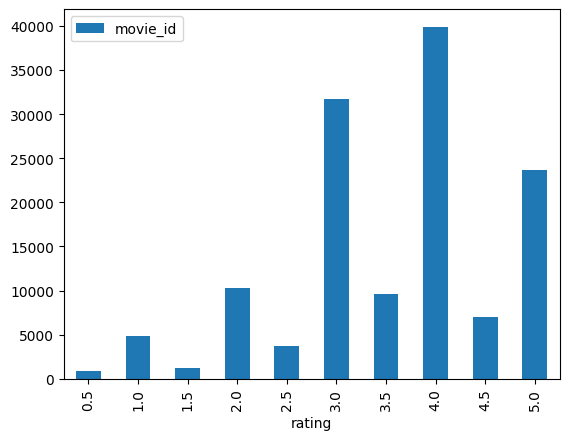

In [15]:
movielens.groupby('rating').agg({'movie_id': len}).plot.bar()

# データの分割

In [16]:
# 学習用とテスト用にデータを分割する
# 各ユーザの直近の５件の映画を評価用に使い、それ以外を学習用とする
# まずは、それぞれのユーザが評価した映画の順序を計算する
# 直近付与した映画から順番を付与していく(1始まり)

movielens['timestamp_rank'] = movielens.groupby(
    'user_id')['timestamp'].rank(ascending=False, method='first')
movielens_train = movielens[movielens['timestamp_rank'] > 5]
movielens_test = movielens[movielens['timestamp_rank']<= 5]